In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
import random
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('./data/data.csv', sep=";")

In [7]:
# overview of the data, features names, etc.
df.head()

,PSEUDO_VIN,TONDUR,EngSpDist_K1,EngSpDist_K2,EngSpDist_K3,EngSpDist_K4,EngSpDist_K5,EngSpDist_K6,EngSpDist_K7,EngSpDist_K8,...,AmbTempDist_K6,AmbTempDist_K7,AmbTempDist_K8,AmbTempDist_K9,AmbTempDist_K10,MILEAGE,DIAGNOSIS_DATE,REPAIR_DATE,TACHOMETER_IN_KM,LABEL
0,5247,1249456.1,239471.8,443507.3,230166.7,18955.4,3453.7,1631.0,748.4,373.2,...,317,416,155,0,0,35008,03.06.14,NaN,NaN,NO_DAMAGE
1,5405,2221482.5,868673.2,862615.7,154180.3,12707.2,2885.7,951.6,466.9,255.2,...,478,479,167,1,0,14959,10.08.15,NaN,NaN,NO_DAMAGE
2,1642,3433681.7,822744.4,1954545.1,366699.7,26077.9,1452.6,238.2,91.5,47.4,...,676,993,261,2,0,37685,30.01.15,NaN,NaN,NO_DAMAGE
3,4784,615134.7,138935.2,209138.3,106259.6,10133.9,1111.9,230.7,81.5,49.9,...,169,295,112,2,0,7054,02.04.15,NaN,NaN,NO_DAMAGE
4,3656,2141362.5,797644.6,729555.5,242742.9,13288.6,2374.5,815.7,341.1,175.1,...,358,750,229,2,1,19680,23.11.15,NaN,NaN,NO_DAMAGE


In [10]:
df.describe()

,PSEUDO_VIN,TONDUR,EngSpDist_K1,EngSpDist_K2,EngSpDist_K3,EngSpDist_K4,EngSpDist_K5,EngSpDist_K6,EngSpDist_K7,EngSpDist_K8,...,AmbTempDist_K3,AmbTempDist_K4,AmbTempDist_K5,AmbTempDist_K6,AmbTempDist_K7,AmbTempDist_K8,AmbTempDist_K9,AmbTempDist_K10,MILEAGE,TACHOMETER_IN_KM
count,5777.000000,5.777000e+03,5.777000e+03,5.777000e+03,5.777000e+03,5777.000000,5777.000000,5777.000000,5777.000000,5777.000000,...,5777.000000,5777.000000,5777.000000,5777.000000,5777.000000,5777.000000,5777.000000,5777.000000,5777.000000,336.000000
mean,2889.000000,1.638604e+06,6.949810e+05,5.659570e+05,1.523329e+05,17916.948520,2744.953176,769.363095,343.032404,181.538982,...,0.041544,1.030812,11.718885,107.391726,331.057989,507.202527,194.065605,12.809070,13322.323524,30366.226190
std,1667.820584,1.478634e+06,7.280069e+05,5.510523e+05,1.698033e+05,31982.030334,6069.909116,1871.395346,803.763476,481.114263,...,0.766331,8.675519,43.497786,182.867761,330.765296,447.363231,282.863019,40.439852,13254.917856,17811.425833
min,1.000000,1.692310e+04,4.641300e+03,4.066000e+02,3.030000e+01,10.400000,3.400000,0.900000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1002.000000,1873.000000
25%,1445.000000,6.443811e+05,2.352837e+05,1.947698e+05,4.601980e+04,3302.400000,609.400000,88.600000,33.900000,15.400000,...,0.000000,0.000000,0.000000,10.000000,113.000000,206.000000,19.000000,0.000000,4485.000000,17586.250000
50%,2889.000000,1.167932e+06,4.634370e+05,3.886051e+05,9.958480e+04,8232.300000,1166.800000,261.900000,103.900000,47.700000,...,0.000000,0.000000,0.000000,36.000000,226.000000,376.000000,87.000000,0.000000,9330.000000,26821.000000
75%,4333.000000,2.111713e+06,8.623770e+05,7.292884e+05,1.953351e+05,19650.900000,2629.400000,753.300000,319.200000,153.100000,...,0.000000,0.000000,4.000000,128.000000,433.000000,652.000000,250.000000,4.000000,17187.000000,40978.000000
max,5777.000000,1.151146e+07,6.959281e+06,4.262310e+06,2.453757e+06,646982.900000,152502.200000,74583.600000,25328.500000,16623.100000,...,41.000000,395.000000,1016.000000,2592.000000,3874.000000,5947.000000,2579.000000,685.000000,157940.000000,115314.000000


In [16]:
df.isna().sum()

PSEUDO_VIN             0
TONDUR                 0
EngSpDist_K1           0
EngSpDist_K2           0
EngSpDist_K3           0
EngSpDist_K4           0
EngSpDist_K5           0
EngSpDist_K6           0
EngSpDist_K7           0
EngSpDist_K8           0
EngSpDist_K9           0
EngSpDist_K10          0
EngSpDist_K11          0
EngSpDist_K12          0
EngSpDist_K13          0
EngSpDist_K14          0
AmbTempDist_K1         0
AmbTempDist_K2         0
AmbTempDist_K3         0
AmbTempDist_K4         0
AmbTempDist_K5         0
AmbTempDist_K6         0
AmbTempDist_K7         0
AmbTempDist_K8         0
AmbTempDist_K9         0
AmbTempDist_K10        0
MILEAGE                0
DIAGNOSIS_DATE         0
REPAIR_DATE         5441
TACHOMETER_IN_KM    5441
LABEL                  0
dtype: int64

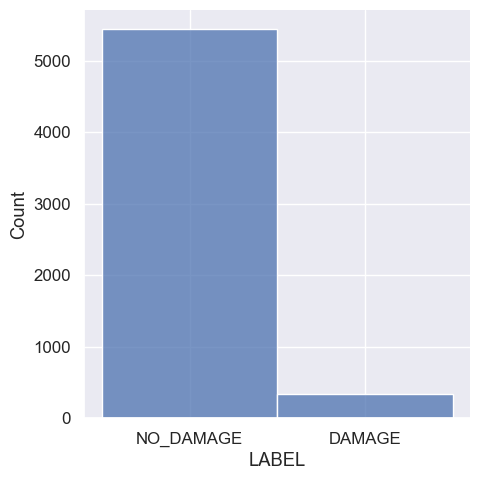

In [39]:
sns.displot(data=df, x="LABEL")

In [90]:
features = list(df.keys())
features.remove('PSEUDO_VIN')
features.remove('REPAIR_DATE')
features.remove('TACHOMETER_IN_KM')
features.remove('LABEL')
len(features)

27

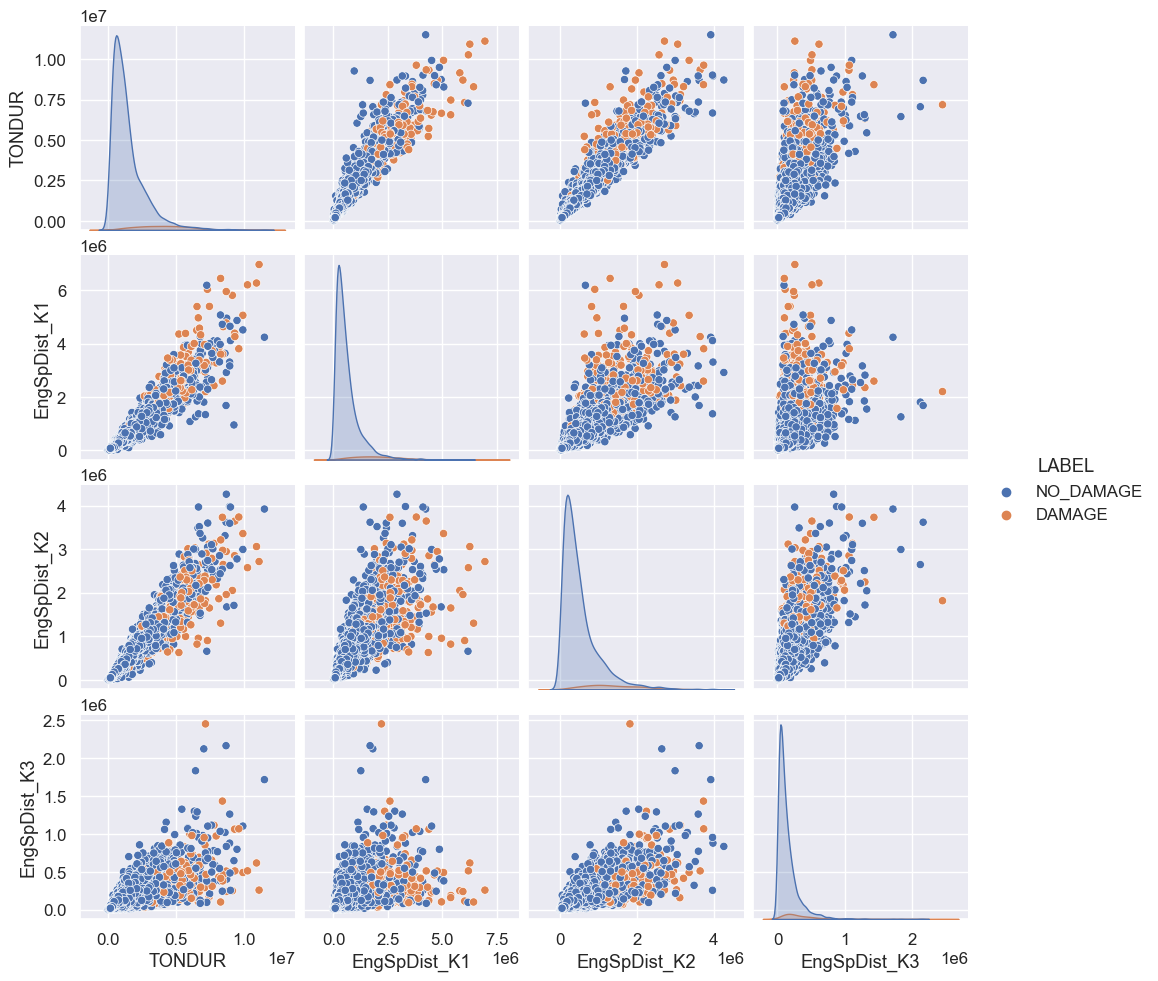

In [88]:

sns.pairplot(df[features[0:4]+['LABEL']], hue="LABEL", height=2.5)

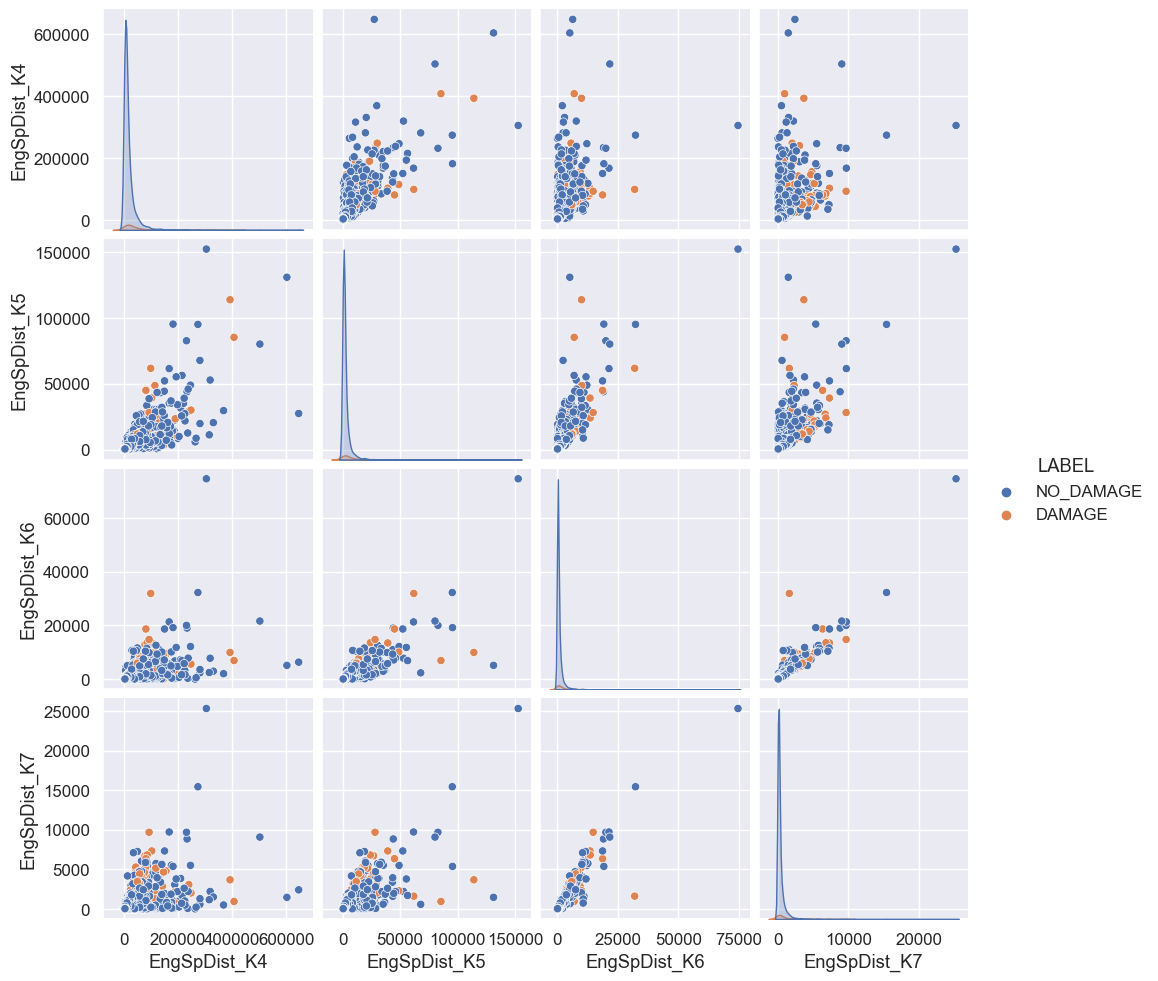

In [72]:

sns.pairplot(df[features[4:8]+['LABEL']], hue="LABEL", height=2.5)

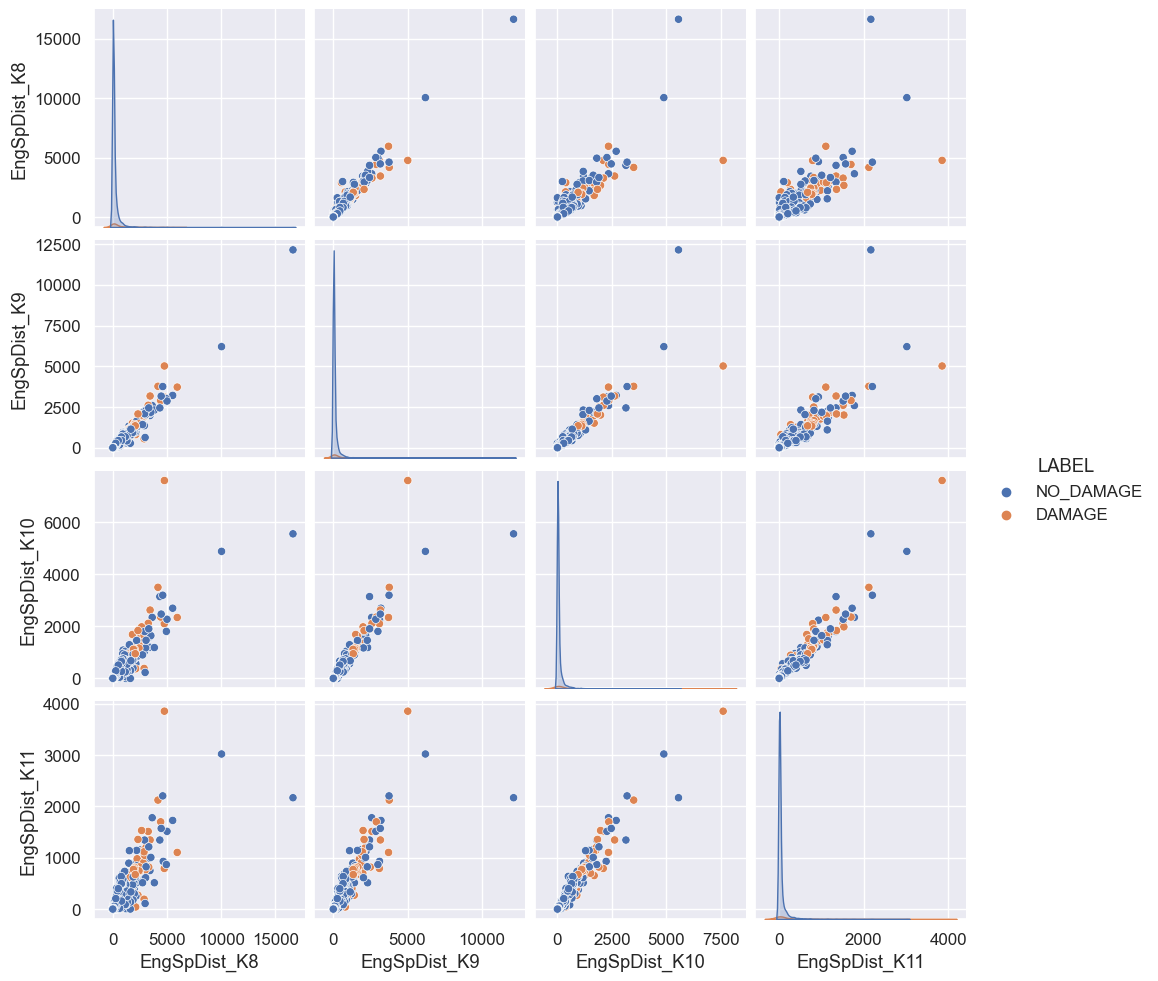

In [73]:

sns.pairplot(df[features[8:12]+['LABEL']], hue="LABEL", height=2.5)

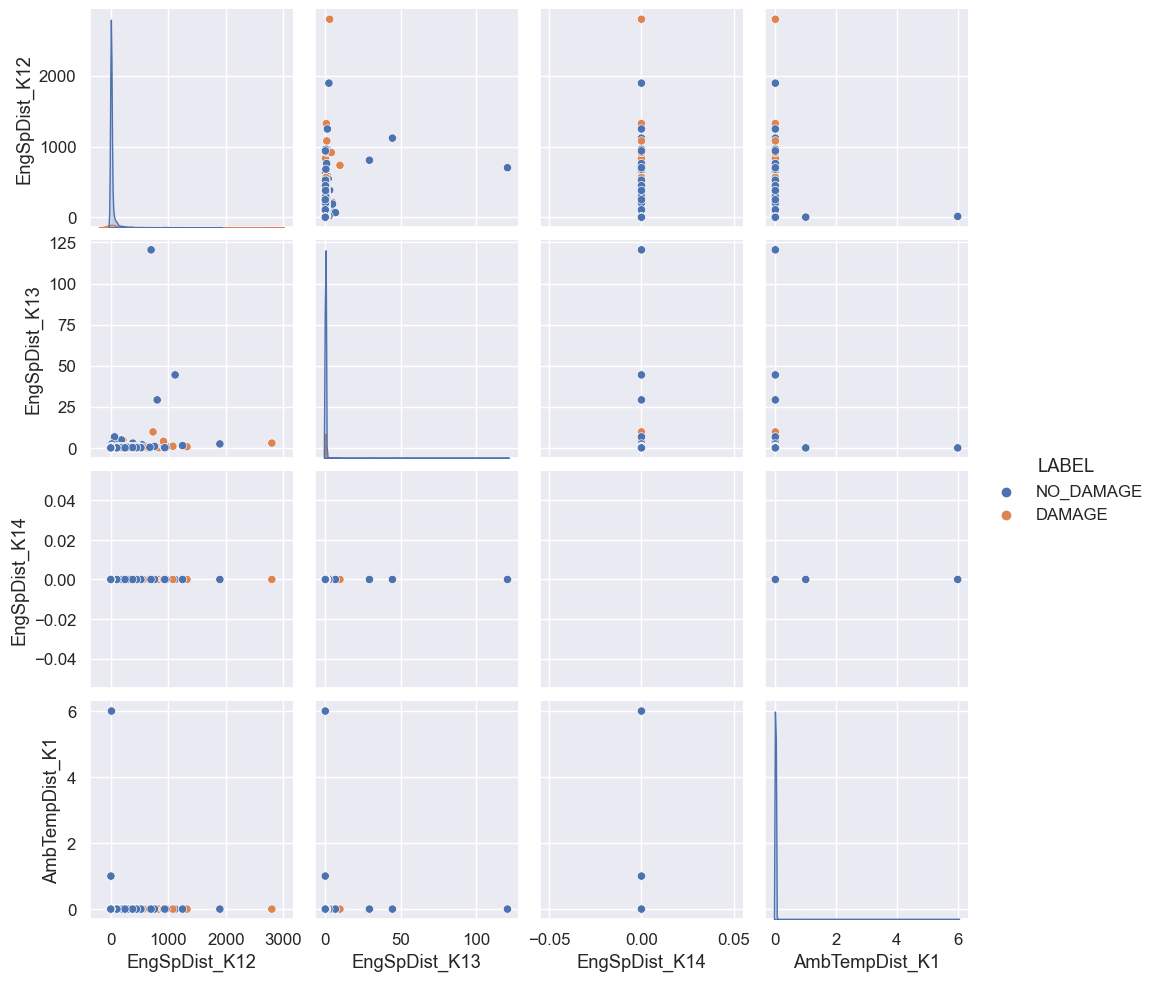

In [75]:
sns.pairplot(df[features[12:16]+['LABEL']], hue="LABEL", height=2.5)

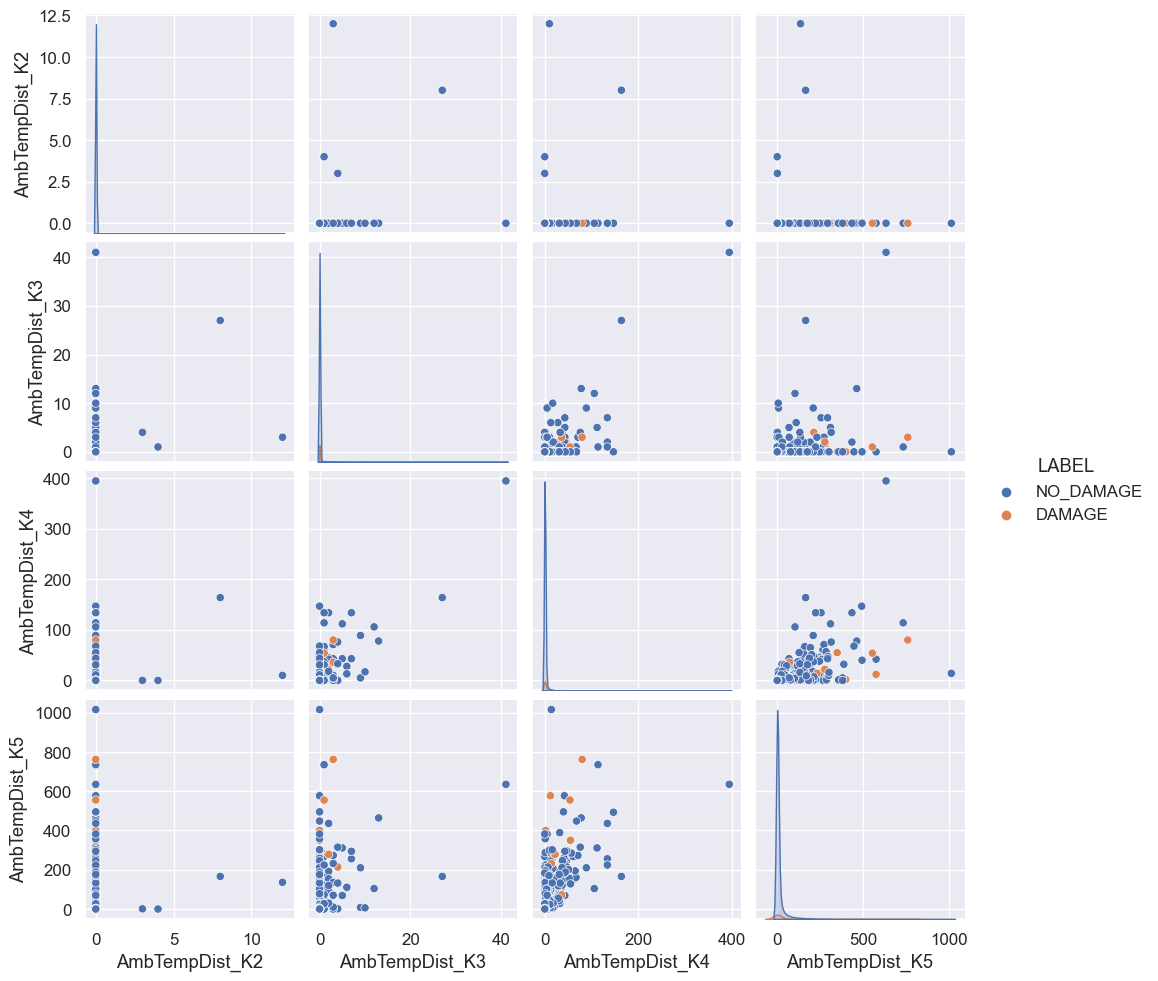

In [92]:
sns.pairplot(df[features[16:20]+['LABEL']], hue="LABEL")

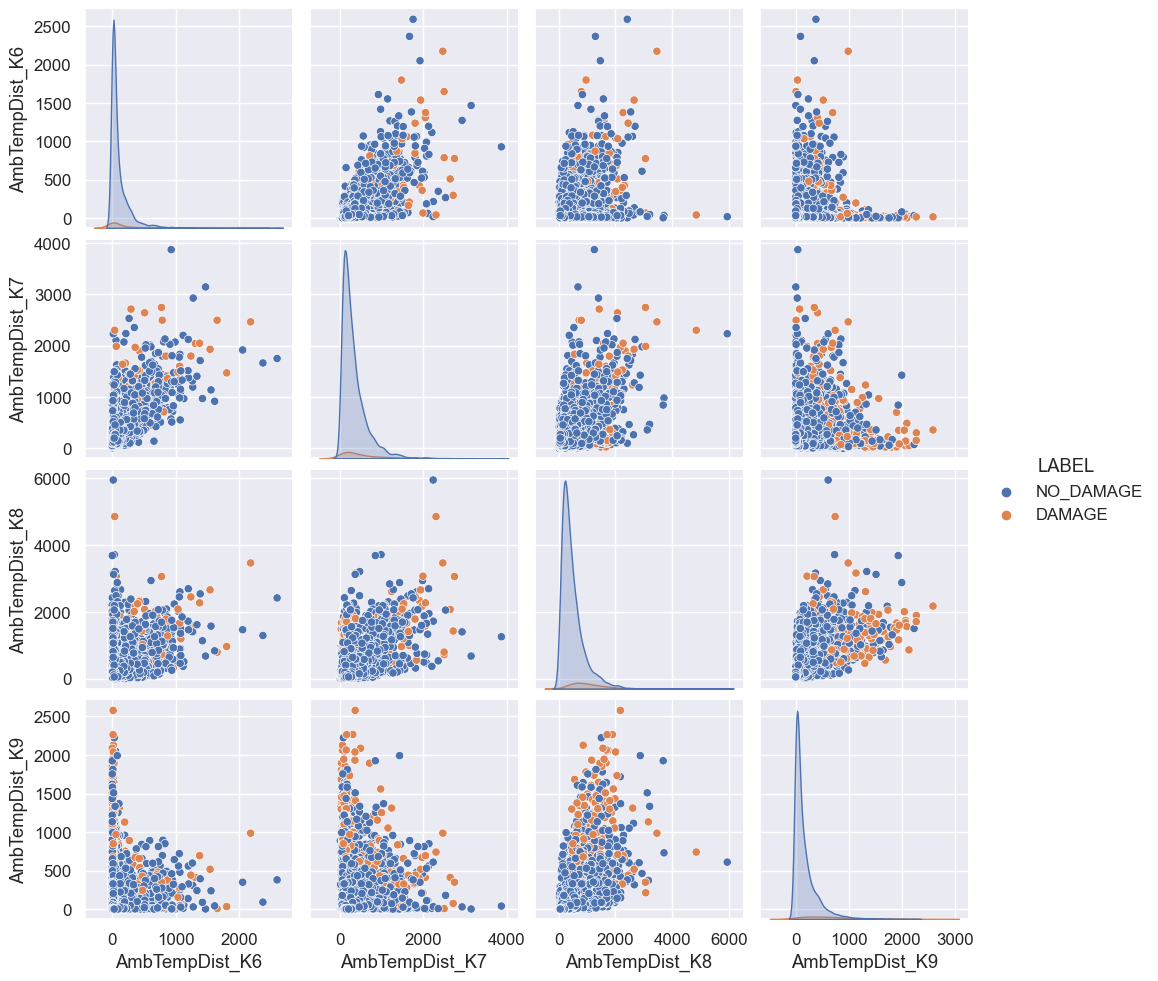

In [93]:
sns.pairplot(df[features[20:24]+['LABEL']], hue="LABEL")

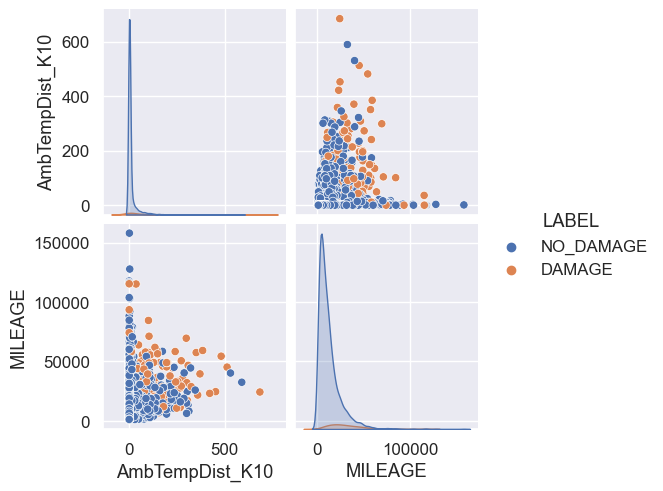

In [98]:
sns.pairplot(df[features[24:28]+['LABEL']], hue="LABEL")